In [9]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
import nltk
from nltk import ngrams

In [11]:
df = pd.read_csv('preprocessed_data.csv')

In [12]:
type(df['transcript'][1])

str

In [13]:
df['transcript']

0      ['tarde', 'amigo', 'bienvenido', 'música', 'en...
1      ['saludar', 'pato', 'medio', 'hora', 'hola', '...
2      ['xxxx', 'xxxx', 'montón', 'xxxx', 'xxxx', 'th...
3      ['hola', 'hola', 'hola', 'hola', 'hola', 'hola...
4      ['sesión', 'bizarrap', 'pasar', 'ritmo', 'trab...
                             ...                        
344    ['bienvenido', 'queridísir', 'amigo', 'calvo',...
345    ['bienvenido', 'queridísir', 'amigo', 'calvo',...
346    ['bienvenido', 'queridísir', 'amigo', 'calvo',...
347    ['holar', 'bienvenido', 'asmr', 'gustar', 'con...
348    ['hola', 'holar', 'bienvenido', 'vídeo', 'asml...
Name: transcript, Length: 349, dtype: object

In [14]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'insultar' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'insultar' per transcript: {total_insults:.2f}")

Average occurrences of 'insultar' per transcript: 35.90
Total occurrences of 'insultar' per transcript: 12529.00


In [15]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [16]:
des_token = [token for des in df['description'].apply(ast.literal_eval) for token in des ]

# Count the occurrences of each token
word_freq = Counter(des_token)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# Output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('participar', 20), ('perxitaa', 19), ('mando', 19), ('top', 19), ('aimcontroller', 19), ('bjean', 18), ('reborn', 18), ('momon', 18), ('violeta', 18), ('pol', 18), ('lolito', 16), ('djmario', 16), ('axozer', 16), ('pato', 16), ('vídeo', 10)]
             Word  Frequency
0      participar         20
1        perxitaa         19
2           mando         19
3             top         19
4   aimcontroller         19
5           bjean         18
6          reborn         18
7           momon         18
8         violeta         18
9             pol         18
10         lolito         16
11        djmario         16
12         axozer         16
13           pato         16
14          vídeo         10


In [17]:
type(processed_transcripts)

pandas.core.series.Series

In [18]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
ay ay ay: 709
valer valer valer: 556
mira mira mira: 384
caer xxxx madre: 188
hola hola hola: 163
ver ver ver: 121
correr correr correr: 120
música música música: 99
xxxx xxxx xxxx: 93
dalar dalar dalar: 93
xxxx hijo xxxx: 87
cuidado cuidado cuidado: 83
uy uy uy: 77
mira mira mirar: 72
venir venir venir: 66
ah valer valer: 51
vale valer valer: 51
bienvenido queridísir amigo: 51
eh eh eh: 51
queridísir amigo calvo: 50


In [19]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.004*"lluvia" + 0.003*"anunciar" + 0.003*"amigo" + 0.002*"xxxx" + 0.002*"raptor" + 0.002*"música" + 0.002*"diluviar" + 0.002*"bikini" + 0.002*"tomar" + 0.002*"martini"
Topic: 1, Words: 0.019*"xxxx" + 0.013*"valer" + 0.010*"ver" + 0.010*"casa" + 0.009*"querer" + 0.009*"mirar" + 0.008*"música" + 0.007*"poner" + 0.007*"venir" + 0.007*"cosa"
Topic: 2, Words: 0.017*"xxxx" + 0.010*"ver" + 0.009*"valer" + 0.009*"querer" + 0.008*"decir" + 0.007*"coche" + 0.007*"venir" + 0.006*"pasar" + 0.006*"cosa" + 0.006*"tener"
Topic: 3, Words: 0.026*"xxxx" + 0.019*"música" + 0.012*"ver" + 0.012*"valer" + 0.012*"pasar" + 0.008*"favor" + 0.007*"pato" + 0.007*"venir" + 0.007*"matar" + 0.006*"querer"
Topic: 4, Words: 0.035*"xxxx" + 0.029*"valer" + 0.015*"eh" + 0.013*"música" + 0.011*"tío" + 0.009*"venir" + 0.009*"mirar" + 0.009*"pasar" + 0.008*"ver" + 0.006*"mira"


In [20]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
eh: 29.398376421715543
casa: 16.514659438424477
matar: 13.96370609514036
coche: 13.655124376505592
ay: 13.407560474594115
mira: 12.709510892488797
juan: 12.060997497761033
pato: 11.77154180213312
cuidado: 11.361960957424364
risa: 9.375211131644821


In [21]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# Output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('xxxx', 12529), ('valer', 8525), ('música', 5253), ('ver', 4957), ('pasar', 4047), ('venir', 3844), ('querer', 3762), ('mirar', 3619), ('eh', 3337), ('cosa', 2873), ('casa', 2796), ('tío', 2707), ('decir', 2684), ('poner', 2649), ('tener', 2404)]
      Word  Frequency
0     xxxx      12529
1    valer       8525
2   música       5253
3      ver       4957
4    pasar       4047
5    venir       3844
6   querer       3762
7    mirar       3619
8       eh       3337
9     cosa       2873
10    casa       2796
11     tío       2707
12   decir       2684
13   poner       2649
14   tener       2404


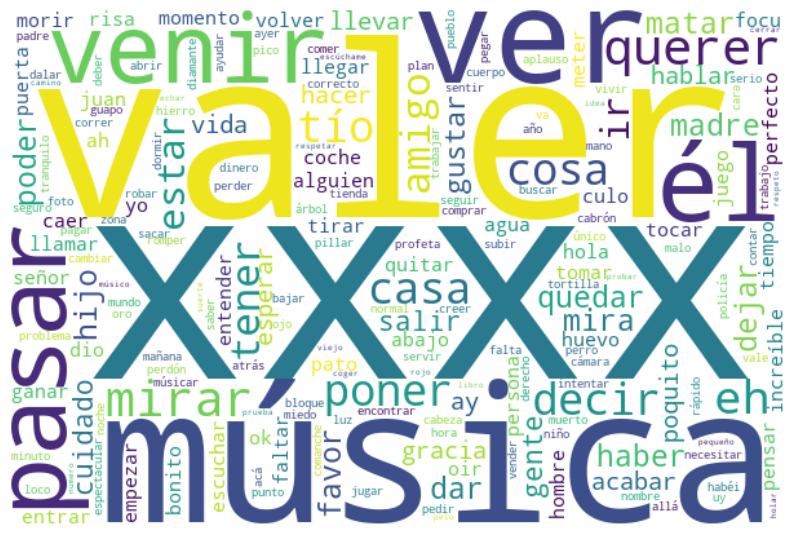

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()